
 Instrucciones:

Utilizarán el dataset de tweets sobre desastres naturales
Estos tweets corresponden a 2 categorías. Los tweets marcados con un 1, corresponden a desastres reales, los marcados con 0 corresponden a desastres no reales

1. Mapear los 1 a "real disaster", y los 0 a "not-real disaster"

2. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

3. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

4. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

5. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

6. Crear nubes de palabras de bigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

7. Crear graficos de barras que muestren los 15 bigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

8. Crear nubes de palabras de trigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

9. Crear graficos de barras que muestren los 15 trigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

10. Crear una funcion de vectorizacion para los tweets del dataset. La funcion debera convertir a minusculas, eliminar hashtags, taggeos del tipo "@usuario" e hipervinculos. Eliminar stopwords, lematizar y obtener la representacion vectorial del texto con base en los vectores de GloVe (glove.6B.300d.txt). Aplicar dicha funcion sobre la columna que contiene el texto de los tweets. Guardar ese resultado en una columna nueva llamada "vector"

11. Crear un modelo de TSNE que permita visualizar los vectores obtenidos en 2 dimensiones. El color estará dictado por la categoría del tweet (desastre real o no) y el hover data deberá ser el texto del tweet original

12. Crear un pipeline de clasificacion para predecir el contenido de la columna "target". Pueden usar la cantidad de modelos e hiperparametros que quieran (nota: minimo dos modelos con dos combianaciones distitnas de parametros cada uno)

13. Crear un motor de busqueda sobre el dataset utilizando similitud coseno (es decir, se debera vectorizar la pregunta  a buscar y computar su similitud contra todos los vectores del dataset. Al final, mostrar los resultados mas similares)
Se sugiere implementar un parametro "x" para controlar el numero de records devueltos. Ejemplo: setear X a 10 implicaria regresar los 10 textos mas parecidos


In [19]:
import numpy as np
import pandas as pd

In [20]:
import re
import nltk
import numpy as np
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
df = pd.read_csv('/Users/jorgejimenez/Documents/UP/NLP/redesneuronales/clickbait_dataset.csv', encoding = "latin-1")

In [22]:
df.head()

,headline,clickbait
0,This Is What $1 USD Gets You In Food All Aroun...,1
1,Make These Easy Chicken Fajita Quesadillas At ...,1
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1
3,34 Online Shops Based In The Southeast You Sho...,1
4,US and France to work together for new Iran sa...,0


In [26]:
import contractions
from tqdm import tqdm
tqdm.pandas()

import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocesamiento_texto(texto):
    texto = contractions.fix(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    texto = word_tokenize(texto)
    texto = [token for token in texto if token not in stop_words]
    texto = [lemmatizer.lemmatize(word) for word in texto]
    texto = ' '.join(texto)
    return texto

df['clean_headline'] = df['headline'].progress_apply(preprocesamiento_texto)
df.head()


100%|██████████| 32000/32000 [00:02<00:00, 11995.58it/s]


,headline,clickbait,clean_headline
0,This Is What $1 USD Gets You In Food All Aroun...,1,usd get food around world
1,Make These Easy Chicken Fajita Quesadillas At ...,1,make easy chicken fajita quesadilla home
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,hardest walking dead video game quiz ever take
3,34 Online Shops Based In The Southeast You Sho...,1,online shop based southeast shopping
4,US and France to work together for new Iran sa...,0,u france work together new iran sanction


In [27]:
mapper = {
    1: 'real disaster',
    0: 'not-real disaster'
}
df['etiqueta'] = df['clickbait'].map(mapper)
df.head()

,headline,clickbait,clean_headline,etiqueta
0,This Is What $1 USD Gets You In Food All Aroun...,1,usd get food around world,real disaster
1,Make These Easy Chicken Fajita Quesadillas At ...,1,make easy chicken fajita quesadilla home,real disaster
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,hardest walking dead video game quiz ever take,real disaster
3,34 Online Shops Based In The Southeast You Sho...,1,online shop based southeast shopping,real disaster
4,US and France to work together for new Iran sa...,0,u france work together new iran sanction,not-real disaster


2. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales


In [28]:
from wordcloud import WordCloud

In [29]:

real_text = " ".join(df[df['etiqueta'] == 'real disaster']['clean_headline'].tolist())
not_real_text = " ".join(df[df['etiqueta'] == 'not-real disaster']['clean_headline'].tolist())

wordcloud_clickbait = WordCloud(width=1200,
                                height=1200,
                                colormap='viridis',
                                background_color='white',
                                min_font_size=4
                               ).generate(real_text)

wordcloud_non_clickbait = WordCloud(width=1200,
                                    height=1200,
                                    colormap='viridis',
                                    background_color='white',
                                    min_font_size=4
                                   ).generate(not_real_text)

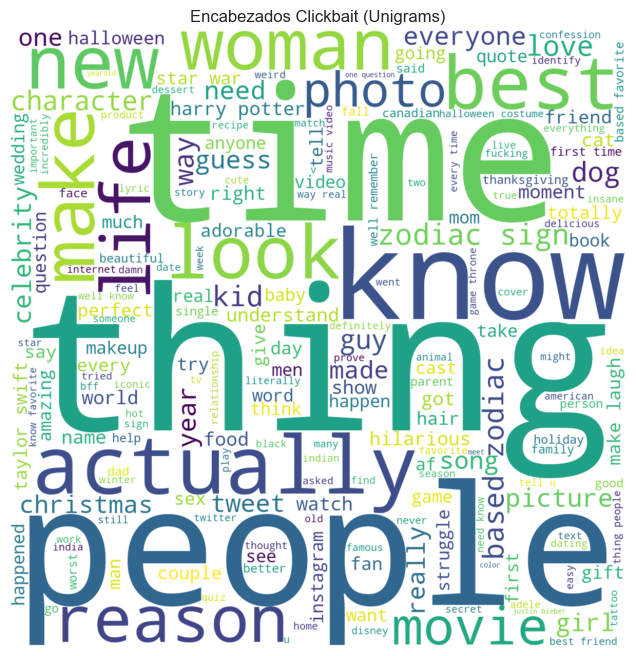

In [30]:
import matplotlib.pyplot as plt

# Nube de palabras para encabezados clickbait
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Clickbait (Unigrams)")
plt.show()


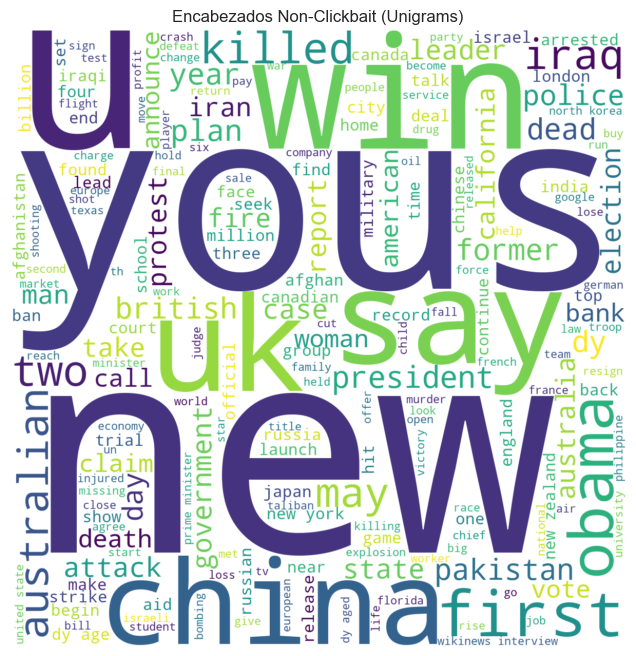

In [31]:
# Nube de palabras para encabezados non-clickbait
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_non_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Non-Clickbait (Unigrams)")
plt.show()


3. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

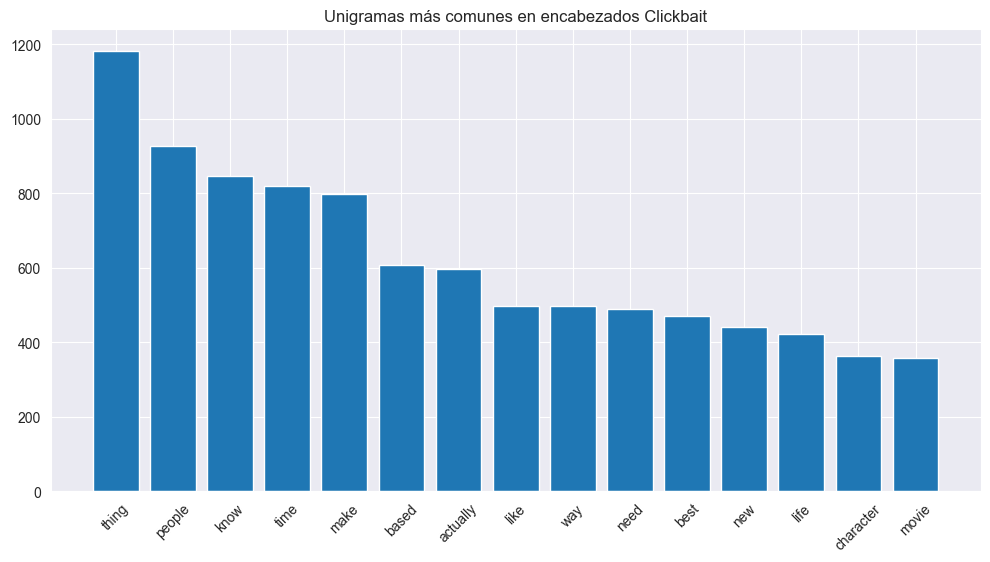

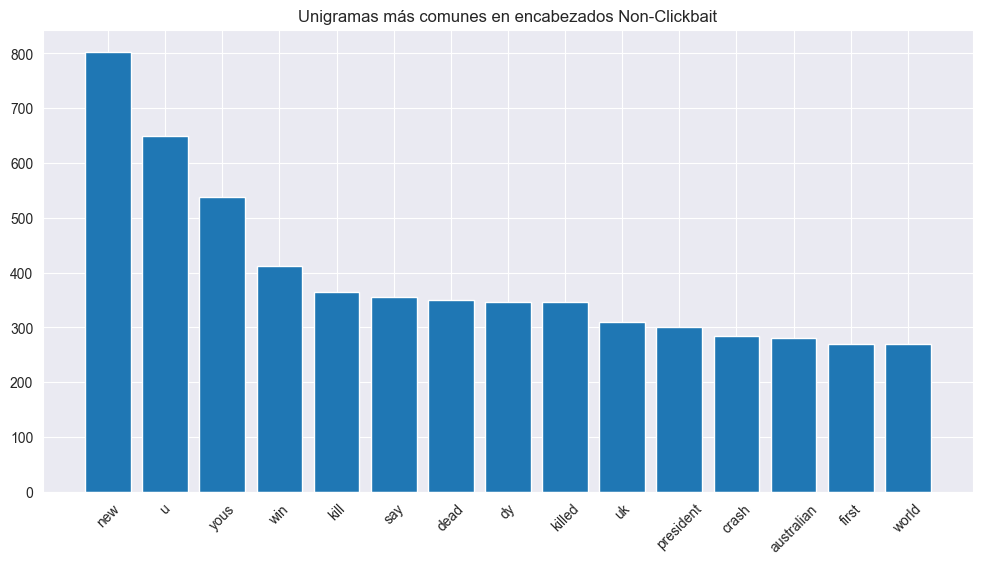

In [32]:
#3. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

from collections import Counter
import matplotlib.pyplot as plt

def plot_unigrams(texto, titulo):
    texto = texto.split()
    counter = Counter(texto)
    counter = counter.most_common(15)
    counter = dict(counter)
    plt.figure(figsize=(12,6))
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=45)
    plt.title(titulo)
    plt.show()

plot_unigrams(real_text, "Unigramas más comunes en encabezados Clickbait")
plot_unigrams(not_real_text, "Unigramas más comunes en encabezados Non-Clickbait")


4. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales


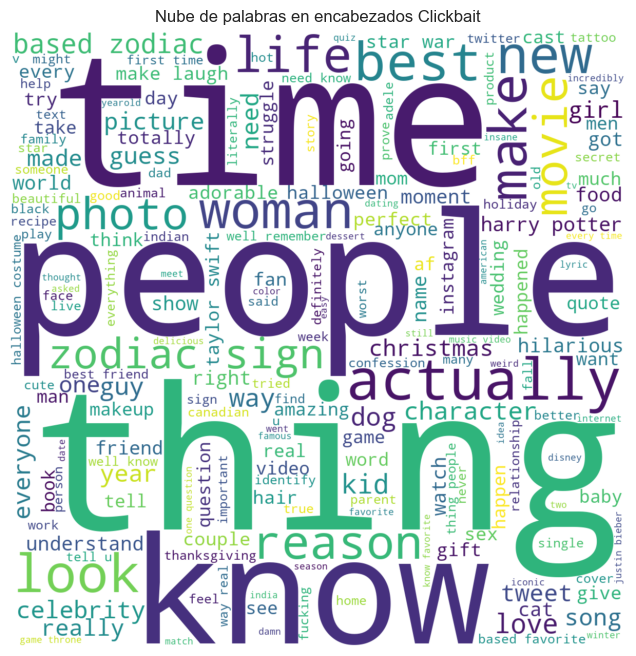

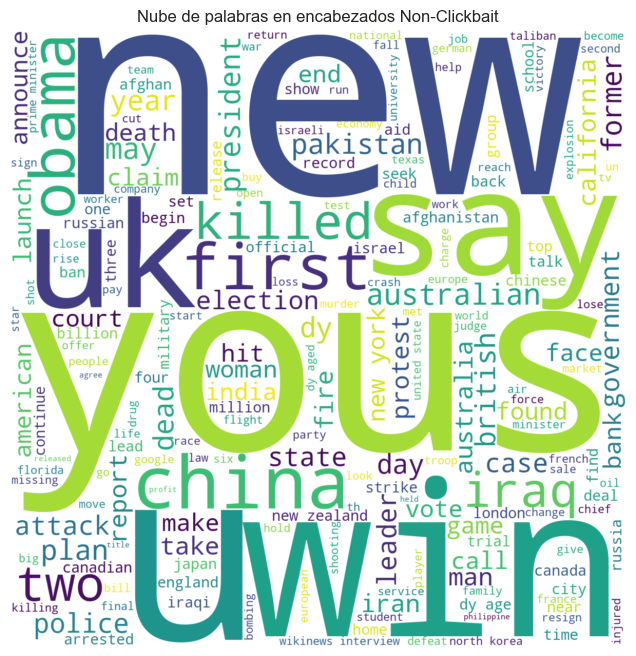

In [33]:
#4. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(texto, titulo):
    wordcloud = WordCloud(width=1200,
                          height=1200,
                          colormap='viridis',
                          background_color='white',
                          min_font_size=4
                         ).generate(texto)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

plot_wordcloud(real_text, "Nube de palabras en encabezados Clickbait")
plot_wordcloud(not_real_text, "Nube de palabras en encabezados Non-Clickbait")


5. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

6. Crear nubes de palabras de bigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales


7. Crear graficos de barras que muestren los 15 bigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales


8. Crear nubes de palabras de trigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

9. Crear graficos de barras que muestren los 15 trigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

10. Crear una funcion de vectorizacion para los tweets del dataset. La funcion debera convertir a minusculas, eliminar hashtags, taggeos del tipo "@usuario" e hipervinculos. Eliminar stopwords, lematizar y obtener la representacion vectorial del texto con base en los vectores de GloVe (glove.6B.300d.txt). Aplicar dicha funcion sobre la columna que contiene el texto de los tweets. Guardar ese resultado en una columna nueva llamada "vector"

11. Crear un modelo de TSNE que permita visualizar los vectores obtenidos en 2 dimensiones. El color estará dictado por la categoría del tweet (desastre real o no) y el hover data deberá ser el texto del tweet original


12. Crear un pipeline de clasificacion para predecir el contenido de la columna "target". Pueden usar la cantidad de modelos e hiperparametros que quieran (nota: minimo dos modelos con dos combianaciones distitnas de parametros cada uno)


13. Crear un motor de busqueda sobre el dataset utilizando similitud coseno (es decir, se debera vectorizar la pregunta  a buscar y computar su similitud contra todos los vectores del dataset. Al final, mostrar los resultados mas similares)
Se sugiere implementar un parametro "x" para controlar el numero de records devueltos. Ejemplo: setear X a 10 implicaria regresar los 10 textos mas parecidos
